# Importing required packages
pandas: A powerful data manipulation and analysis library for Python, providing data structures like DataFrames.
numpy: A fundamental package for scientific computing with Python, supporting large, multi-dimensional arrays and matrices.
re: A module providing support for regular expressions in Python, useful for string searching and manipulation.
sklearn.preprocessing: A submodule in scikit-learn containing utilities and functions for data preprocessing and feature extraction.
warnings: A module to control the display of warning messages in Python.
seaborn: A data visualization library based on Matplotlib, providing a high-level interface for drawing attractive statistical graphics.
scipy.stats: A module in SciPy that contains a large number of probability distributions, statistical functions, and tests.

In [127]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MultiLabelBinarizer
import warnings
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
# Suppress specific warnings
warnings.filterwarnings('ignore', category=UserWarning)
# Suppress all warnings
warnings.filterwarnings('ignore')


# Load and Read the Dataset
Finding the NaN , None and Missing values

In [102]:
# Read the data
df = pd.read_csv(r"C:\Users\Satya Kilani\OneDrive\Documents\hunarintern\food_coded.csv")
df.isna().sum().sum()

149

# Finding whether the Dataset Is Having Duplicate Rows or Columns
This code snippet effectively checks for duplicate rows and columns in a DataFrame and prints the results. 

In [103]:
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")
duplicates = df.columns[df.columns.duplicated()]
if len(duplicates) > 0:
    print("Duplicate columns found:")
    print(duplicates)
else:
    print("No duplicate columns found.")

No duplicate rows found.
No duplicate columns found.


# Removing Irrelevent columns
The code snippet provided is used to clean a DataFrame by removing specific irrelevant columns and then saving the cleaned data to a CSV file.
The dataset much effect by removing the below columns

In [104]:
irrelevant_columns = ['comfort_food_reasons', 'comfort_food_reasons_coded','fav_cuisine','GPA','eating_changes','diet_current','ideal_diet']  # replace with the actual column names you want to drop

# Drop the irrelevant columns
df_cleaned = df.drop(columns=irrelevant_columns)

# Save the cleaned data
df_cleaned.to_csv('cleaned_data.csv', index=False)

print("Irrelevant columns removed and data saved as 'cleaned_data.csv'.")


Irrelevant columns removed and data saved as 'cleaned_data.csv'.


# Replacing The Numeric Or Float Type columns with Mean Value
The provided code snippet is used to fill missing values (NaNs) in a DataFrame with the mean of the respective columns and then checks if any NaNs remain in the DataFrame

In [105]:
df_fillna_mean = df_cleaned.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)
df_fillna_mean.isna().sum().sum()

39

# Using Label Ecoder For Single  STRING valued columns
The code snippet is using LabelEncoder from sklearn.preprocessing to encode two categorical columns, father_profession and mother_profession, in a DataFrame. The encoded labels are then used to replace the original columns, and the temporary columns are dropped.

In [106]:
#label encoder for single valued coulumns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
df_fillna_mean['father_profession_label'] = label_encoder.fit_transform(df_fillna_mean['father_profession'])
df_fillna_mean['father_profession']=df_fillna_mean['father_profession_label']
df_fillna_mean.drop(columns=['father_profession_label'],axis='1',inplace=True)
print(set(list(df_fillna_mean['father_profession'])))

label_encoder = LabelEncoder()
df_fillna_mean['mother_profession_label'] = label_encoder.fit_transform(df_fillna_mean['mother_profession'])
df_fillna_mean['mother_profession']=df_fillna_mean['mother_profession_label']
df_fillna_mean.drop(columns=['mother_profession_label'],axis='1',inplace=True)
print(set(list(df_fillna_mean['mother_profession'])))

df_fillna_mean.info()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data c

# Encoding for multivalued columns by using MultiLabelBinarizer
The code snippet processes the 'comfort_food' column to encode it using MultiLabelBinarizer, transforming the column into multiple binary columns representing each unique comfort food

In [107]:
# Extract the 'comfort_food' column
comfort_food = df_fillna_mean['comfort_food'].fillna("")

# Split the strings into lists of foods
comfort_food = comfort_food.apply(lambda x: re.split(r', | and ', x, flags=re.IGNORECASE))

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the comfort food data
comfort_food_encoded = mlb.fit_transform(comfort_food)

# Create a DataFrame from the encoded data
comfort_food_df = pd.DataFrame(comfort_food_encoded, columns=mlb.classes_)

df_fillna_mean[mlb.classes_] = comfort_food_df

df_fillna_mean.drop(columns=['comfort_food'],axis='1',inplace=True)
df_fillna_mean[mlb.classes_].head(10)

,,Chinese food,& fries,",mozzarella sticks",Broccoli,Burger,Burgers,Candy,Candy\rPop\rChocolate \rChipotle \rMoe's,Cheese,...,subs,sweets,terra chips,toast,truffles,twizzlers,vinegar chips,watermelon,wine. mac,wings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The code snippet processes the 'food_childhood' column to encode it using MultiLabelBinarizer, transforming the column into multiple binary columns representing each unique food_childhood

In [108]:
# Extract the 'food_childhood' column
food_childhood = df_fillna_mean['food_childhood'].fillna("")

# Split the strings into lists of foods, filtering out empty strings
food_childhood = food_childhood.apply(lambda x: [food.strip().title() for food in re.split(r', | and | And ', x, flags=re.IGNORECASE) if food.strip()])

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the food childhood data
food_childhood_encoded = mlb.fit_transform(food_childhood)

# Create a DataFrame from the encoded data
food_childhood_df = pd.DataFrame(food_childhood_encoded, columns=mlb.classes_)

df_fillna_mean[mlb.classes_] = food_childhood_df
df_fillna_mean.drop(columns=['food_childhood'],axis='1',inplace=True)
df_fillna_mean[mlb.classes_].head(10)

,& Roast Beef,And Burgers,And Chicken / Pizza/ Tenders,And Corn On The Cob,And Grilled Cheese,And Hot Dogs,And Pasta,And Roast,And Tiramisu,And Turkey,...,Stromboli Mac,Tacos,Tortellini,Tuna Fish Salad,Tuna Noodle Casserole,Ugali,Waffles,Wedding Soup,Wings,Won Tons
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The code snippet processes the 'healthy_meal' column to encode it using MultiLabelBinarizer, transforming the column into multiple binary columns representing each unique healthy meal item. 

In [109]:
# Extract the 'healthy_meal' column
healthy_meal = df_fillna_mean['healthy_meal'].fillna("")

# Function to split and clean the meal descriptions
def split_and_clean(meal):
    # Split by commas and ' and '
    items = re.split(r', | and ', meal, flags=re.IGNORECASE)
    # Strip whitespace and title case each item
    return [item.strip().title() for item in items if item.strip()]

# Apply the function to the 'healthy_meal' column
healthy_meal_split = healthy_meal.apply(split_and_clean)

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the healthy meal data
healthy_meal_encoded = mlb.fit_transform(healthy_meal_split)

# Create a DataFrame from the encoded data
healthy_meal_df = pd.DataFrame(healthy_meal_encoded, columns=mlb.classes_)

df_fillna_mean[mlb.classes_] = healthy_meal_df
df_fillna_mean.drop(columns=['healthy_meal'],axis='1',inplace=True)
df_fillna_mean[mlb.classes_].head(10)

,(More Of Grains,2 Tablespoons Of Salad Dressing,4-6 Ounces Chicken Or Fish,A Balance Of Meat,A Balance Of Vegetables,A Balanced Meal With A Protein,A Cooked Meal.,A Cup Of Rice,A Diet That Is Well Balanced In Most Of The Nutrients Needed For The Body.,A Fruit,...,Vegtables,Very Colorful,Vitamins,Water,Well Balanced With Protein,Well Portioned Meat,White Meat,Whole Grain Carbs,Whole Grains,Zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The code processes the 'meals_dinner_friend' column to encode it using MultiLabelBinarizer, transforming the column into multiple binary columns representing each unique meal item mentioned

In [110]:
# Extract the 'meals_dinner_friend' column
meals_dinner_friend = df_fillna_mean['meals_dinner_friend'].fillna("")

# Function to split and clean the meal descriptions
def split_and_clean(meal):
    # Split by commas, ' and ', and line breaks
    items = re.split(r', | and |[\r\n]+', meal, flags=re.IGNORECASE)
    # Strip whitespace and title case each item
    return [item.strip().title() for item in items if item.strip()]

# Apply the function to the 'meals_dinner_friend' column
meals_dinner_friend_split = meals_dinner_friend.apply(split_and_clean)

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the meals_dinner_friend data
meals_dinner_friend_encoded = mlb.fit_transform(meals_dinner_friend_split)

# Create a DataFrame from the encoded data
meals_dinner_friend_df = pd.DataFrame(meals_dinner_friend_encoded, columns=mlb.classes_)

df_fillna_mean[mlb.classes_] = meals_dinner_friend_df
df_fillna_mean.drop(columns=['meals_dinner_friend'],axis='1',inplace=True)
df_fillna_mean[mlb.classes_].head(10)


,1. Pasta 2. Spaghetti 3. Chicken,A Chicken Dish,Alfredo,And Chicken,And Ice Cream,And Rice.,And Soup,Any Chinese Food,Anything Chicken Related,Anything They'D Want. I'D Ask Them Before Hand What They Want To Eat,...,Tacos,Take Out,Toast,Tomato Soup,Veal,Vegetables,Veggies. Chicken,Vietnamese Fried Rolls,Wedding Soup,Wine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Extracting sports column and mapping it with numeric values
The code snippet is designed to encode the 'type_sports' column by mapping unique sports to numeric values and replacing non-informative entries with placeholders

In [111]:
 # Replace 'nan', 'none', and empty strings with placeholders
df_fillna_mean['type_sports'].replace(['nan', 'none', '', ' None', 'no particular engagement', 'No sport'], inplace=True)

# Create a mapping for unique sports to numeric identifiers
sports_mapping = {sport: idx for idx, sport in enumerate(df_fillna_mean['type_sports'].unique(), start=1)}

# Map the sports to their numeric identifiers
df_fillna_mean['type_sports_encoded'] = df_fillna_mean['type_sports'].map(sports_mapping)
df_fillna_mean.drop(columns=['type_sports'],axis='1',inplace=True)
print(list(df_fillna_mean['type_sports_encoded']))
df_fillna_mean.isna().sum().sum()

[1, 2, 2, 3, 4, 5, 6, 6, 6, 7, 6, 8, 9, 10, 11, 11, 3, 12, 13, 14, 15, 16, 17, 18, 18, 19, 11, 20, 3, 3, 21, 22, 15, 3, 23, 24, 25, 26, 24, 11, 27, 3, 3, 28, 29, 29, 30, 31, 32, 32, 3, 11, 20, 3, 12, 23, 11, 23, 33, 34, 35, 3, 36, 37, 29, 3, 38, 39, 6, 3, 40, 4, 3, 41, 3, 42, 43, 2, 44, 45, 3, 46, 47, 48, 49, 50, 51, 7, 3, 52, 53, 54, 55, 3, 56, 32, 15, 57, 16, 23, 58, 3, 3, 59, 60, 61, 3, 62, 19, 19, 29, 3, 3, 3, 63, 11, 11, 64, 3, 15, 4, 65, 65, 3, 3]


2

# Extracting weights column and mapping it with numeric values
The extract and map the 'weight' column with numeric values while handling missing data by filling with the mean

In [112]:
df_fillna_mean['weight'] = pd.to_numeric(df_fillna_mean['weight'], errors='coerce')
df_fillna_mean['weight'] = df_fillna_mean['weight'].transform(lambda x: x.fillna(x.mean()))
print(df_fillna_mean['weight'])


0      187.0
1      155.0
2      158.5
3      158.5
4      190.0
       ...  
120    156.0
121    180.0
122    120.0
123    135.0
124    135.0
Name: weight, Length: 125, dtype: float64


# 0 NAN values
DataFrame df_fillna_mean has no missing values after filling them with the mean for the 'weight' column. This indicates that all NaN values in the entire DataFrame have been successfully handled.

In [113]:
df_fillna_mean.isna().sum().sum()

0

In [114]:
df_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Columns: 699 entries, Gender to type_sports_encoded
dtypes: float64(19), int32(654), int64(26)
memory usage: 363.4 KB


# To Identify the OUTLIERS
The code snippet to plot box plots for each numeric column.
The box plots provide visual insights into the distribution and spread of numeric data across the selected columns, aiding in understanding the data's variability and potential outliers.


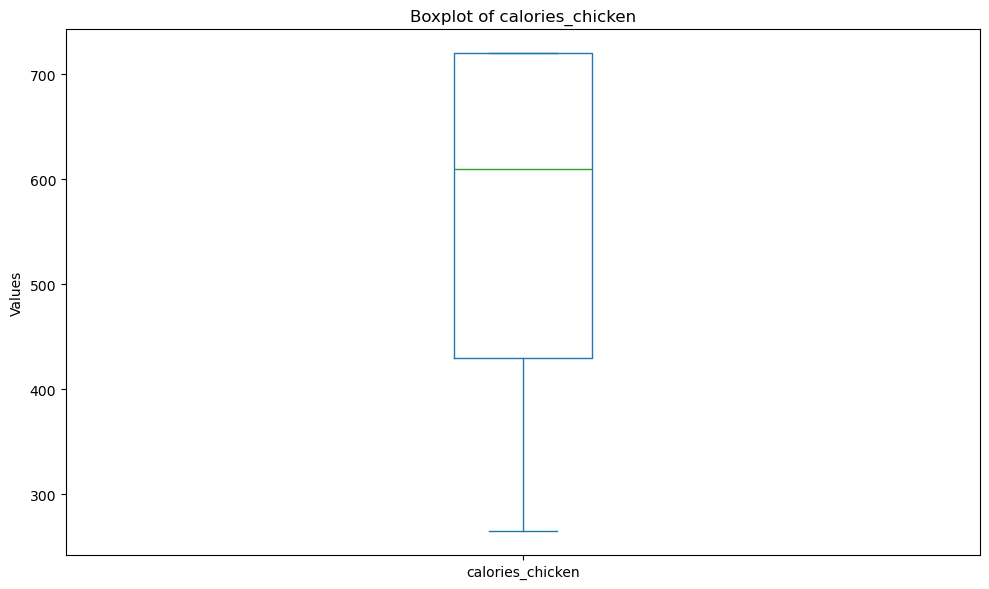

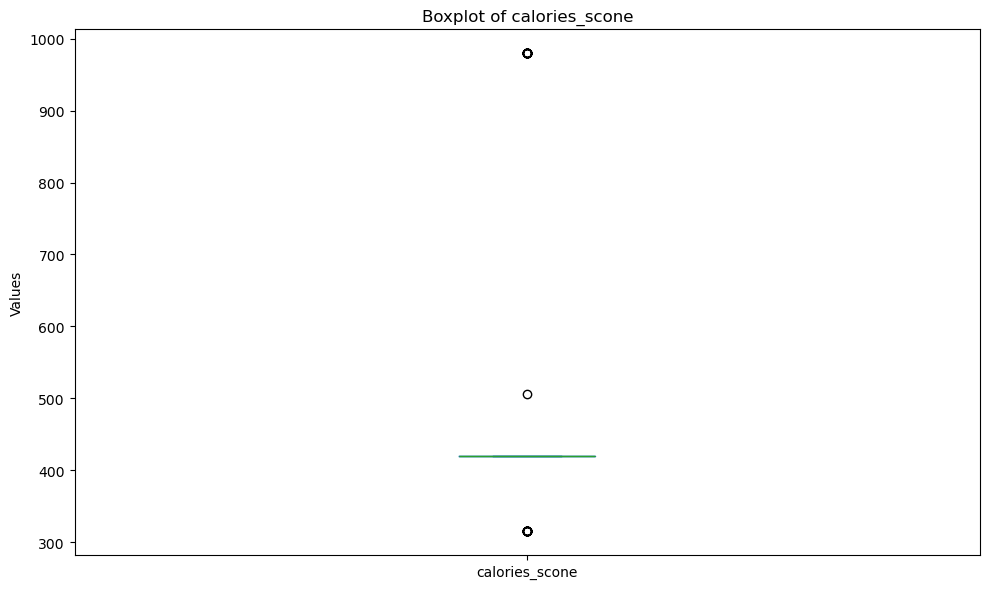

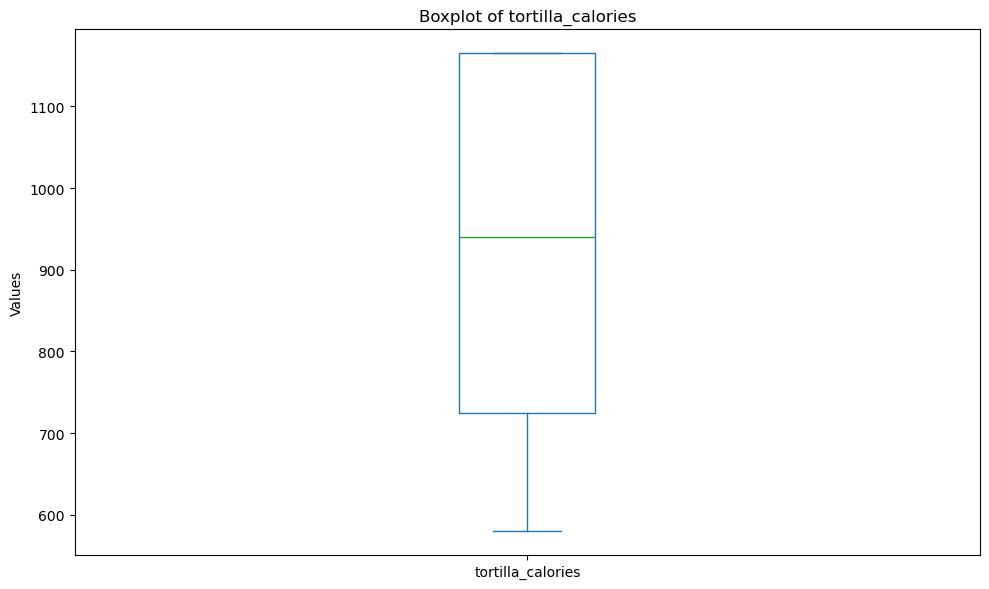

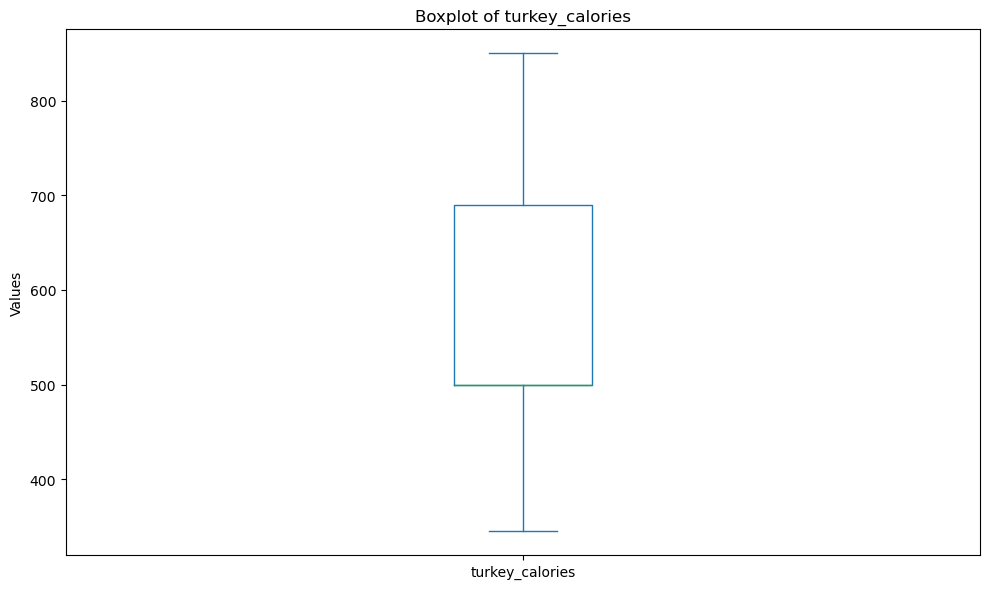

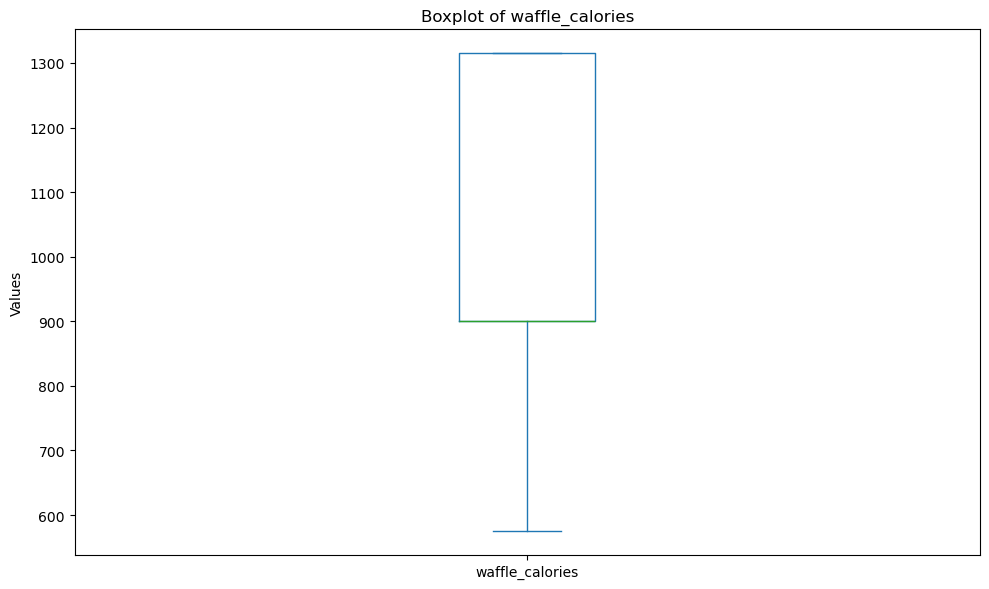

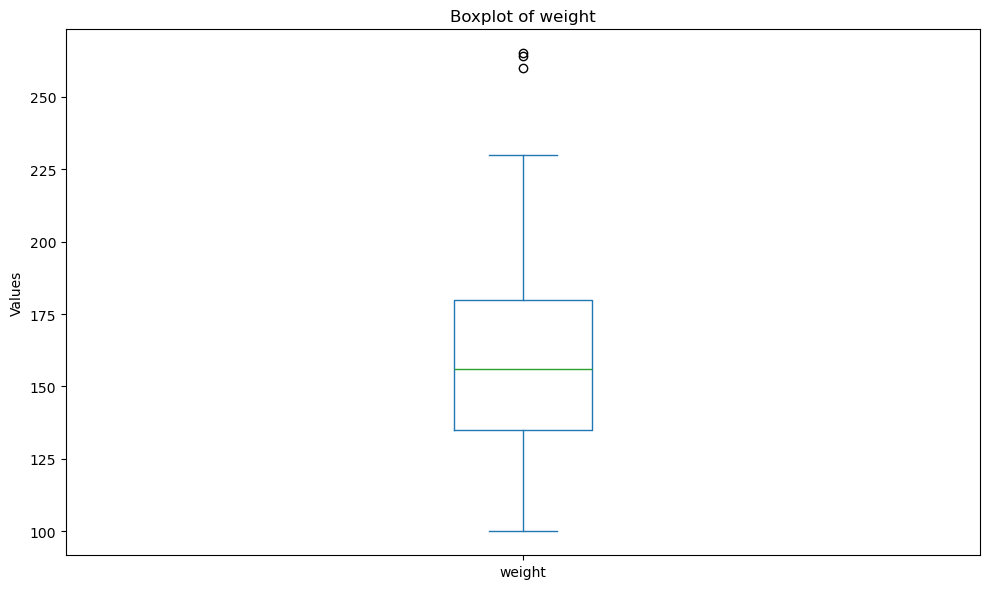

In [115]:
# Plotting box plots for each numeric column
cols = ['calories_chicken', 'calories_scone', 'tortilla_calories', 'turkey_calories', 'waffle_calories', 'weight']
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 6))
    df_fillna_mean[col].plot(kind='box', vert=True, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel('Values')
    plt.tight_layout()
    plt.show()

# Filling the OUtliers  With Mean 
The code snippet calculates the interquartile range (IQR) for the 'calories_scone' column, identifies outliers based on the IQR boundaries, replaces outliers with the mean value of non-outliers, and then displays summary statistics after outlier replacement.

In [116]:
# Calculate the IQR
Q1 = df_fillna_mean['calories_scone'].quantile(0.25)
Q3 = df_fillna_mean['calories_scone'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df_fillna_mean['calories_scone'] < lower_bound) | (df_fillna_mean['calories_scone'] > upper_bound)

# Calculate mean or median of non-outlier values
mean_value = df_fillna_mean['calories_scone'][~outliers].mean()
# median_value = df_fillna_mean['calories_scone'][~outliers].median()  # Alternatively, use median

# Replace outliers with the mean (or median)
df_fillna_mean.loc[outliers, 'calories_scone'] = mean_value
# df_fillna_mean.loc[outliers, 'calories_scone'] = median_value  # Alternatively, use median

# Display summary statistics
print("After outlier replacement:")
print(df_fillna_mean['calories_scone'].describe())


After outlier replacement:
count    125.0
mean     420.0
std        0.0
min      420.0
25%      420.0
50%      420.0
75%      420.0
max      420.0
Name: calories_scone, dtype: float64


In [117]:
# Calculate the IQR
Q1 = df_fillna_mean['weight'].quantile(0.25)
Q3 = df_fillna_mean['weight'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df_fillna_mean['weight'] < lower_bound) | (df_fillna_mean['weight'] > upper_bound)

# Calculate mean or median of non-outlier values
mean_value = df_fillna_mean['weight'][~outliers].mean()
# median_value = df_fillna_mean['weight'][~outliers].median()  # Alternatively, use median

# Replace outliers with the mean (or median)
df_fillna_mean.loc[outliers, 'weight'] = mean_value
# df_fillna_mean.loc[outliers, 'weight'] = median_value  # Alternatively, use median

# Display summary statistics
print("After outlier replacement:")
print(df_fillna_mean['weight'].describe())


After outlier replacement:
count    125.000000
mean     155.930328
std       26.402843
min      100.000000
25%      135.000000
50%      155.930328
75%      175.000000
max      230.000000
Name: weight, dtype: float64


# After handling the outliers
plot box plots for each numeric column in your DataFrame df_fillna_mean. Box plots are a great way to visualize the distribution of numerical data and identify outlier

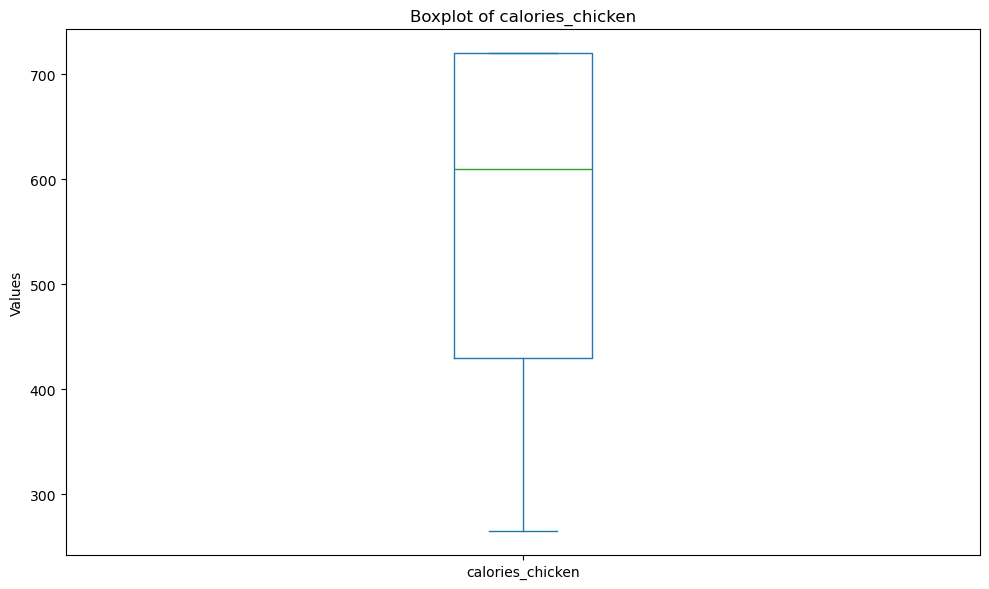

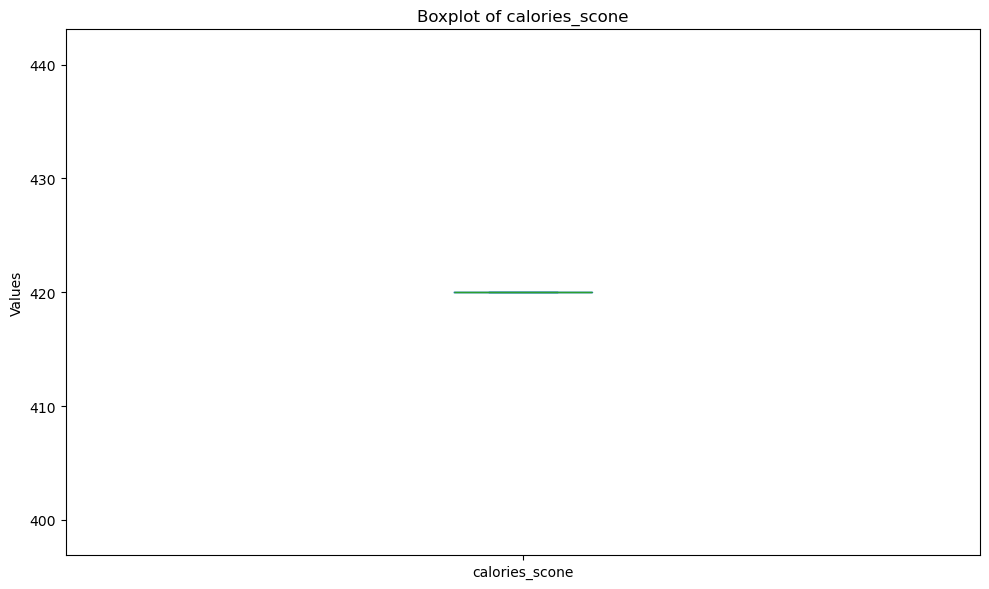

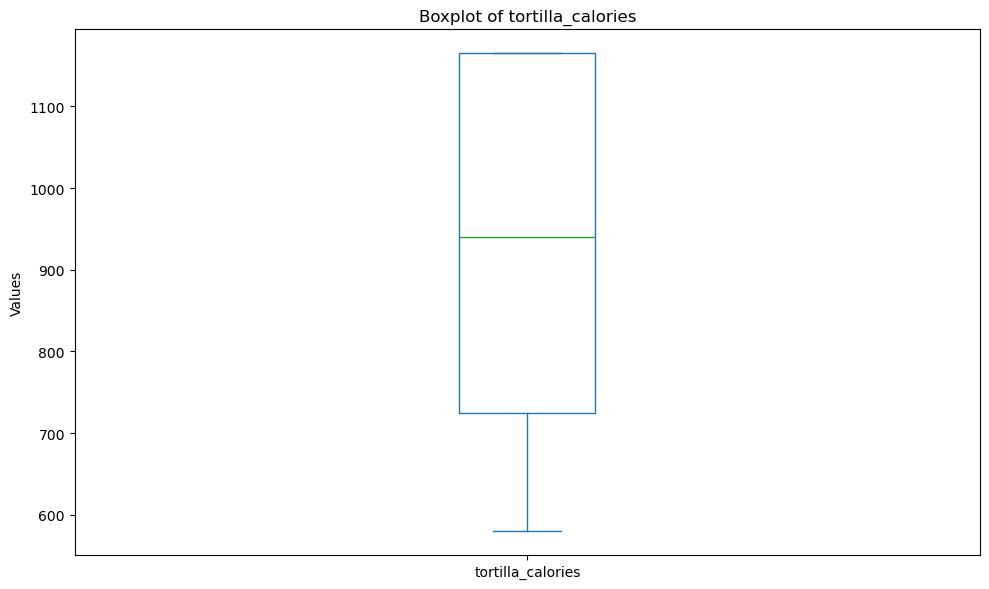

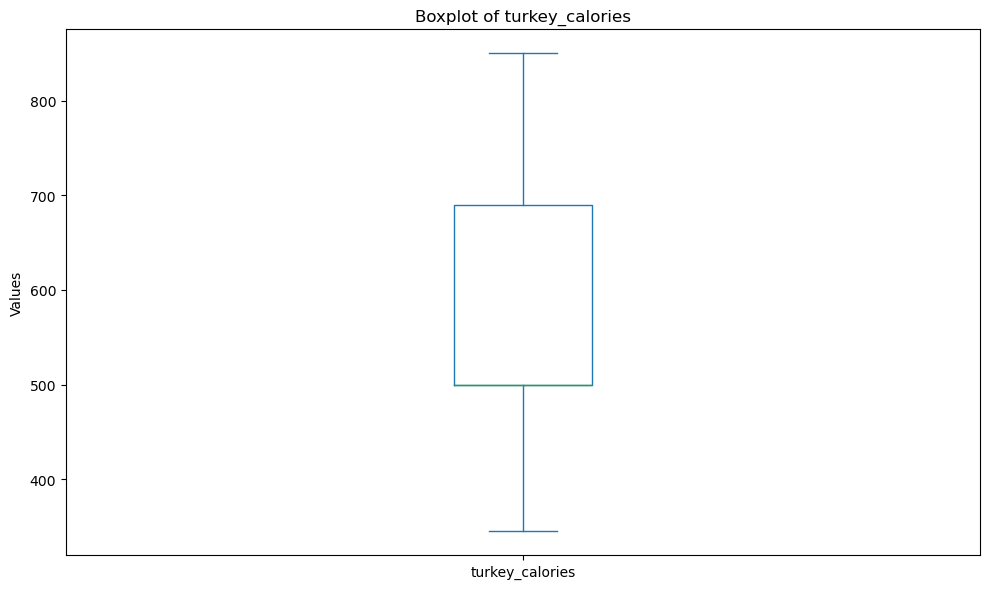

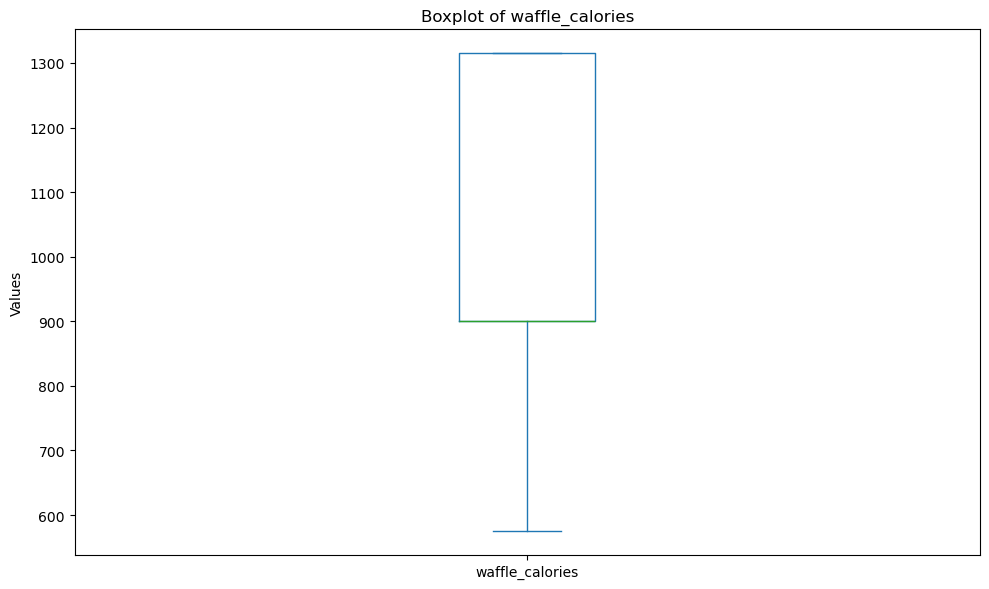

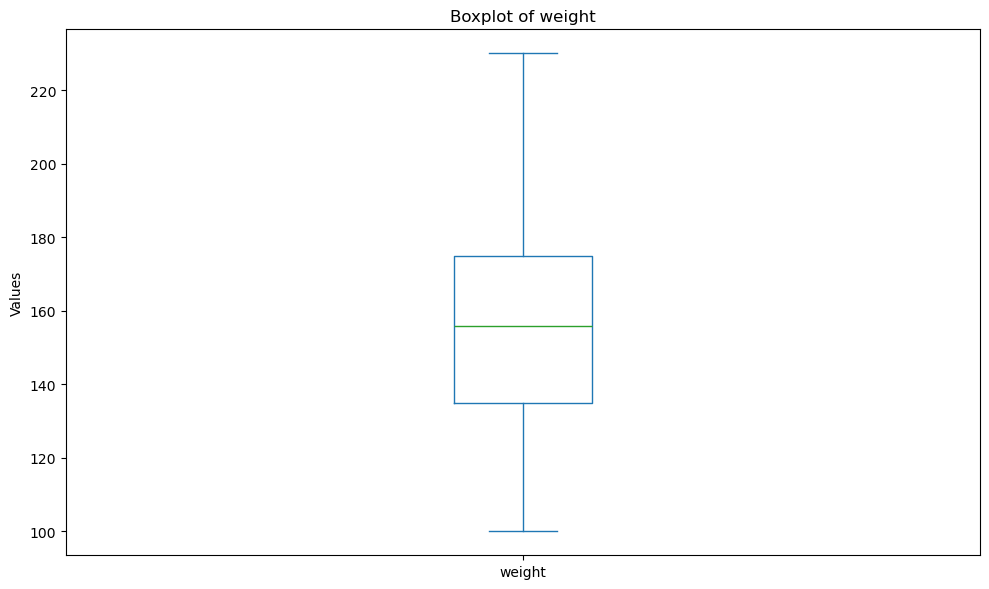

In [118]:
# Plotting box plots for each numeric column
cols = ['calories_chicken', 'calories_scone', 'tortilla_calories', 'turkey_calories', 'waffle_calories', 'weight']
for col in cols:
    fig, ax = plt.subplots(figsize=(10, 6))
    df_fillna_mean[col].plot(kind='box', vert=True, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel('Values')
    plt.tight_layout()
    plt.show()

In [119]:
df_fillna_mean.shape

(125, 699)

# Scaling data
The provided code snippet demonstrates how to standardize (or scale) specific columns in a DataFrame using StandardScaler from scikit-learn

In [120]:
# Initialize the scaler
scaler = StandardScaler()

# Select the columns to scale
cols = ['calories_chicken','tortilla_calories', 'turkey_calories', 'waffle_calories']

# Fit and transform the specified columns
df_fillna_mean[cols] = scaler.fit_transform(df_fillna_mean[cols])

# Display the first few rows to confirm the changes
print(df_fillna_mean[cols].head())

   calories_chicken  tortilla_calories  turkey_calories  waffle_calories
0         -1.127263           1.084565        -1.384030         0.975490
1          0.250061          -1.110311         0.889301        -0.700124
2          1.091758           1.084565        -0.362679        -0.700124
3         -1.127263          -1.110311         0.889301         0.975490
4          1.091758          -0.037815        -0.362679        -1.265391


In [121]:
# Handle missing values by filling with the mean of the column
#df_fillna_mean['calories_scone'].fillna(df_fillna_mean['calories_scone'].mean(), inplace=True)

# Apply StandardScaler
scaler = StandardScaler()
df_fillna_mean['calories_scone_scaled'] = scaler.fit_transform(df[['calories_scone']])

# Display the scaled values
df_fillna_mean['calories_scone'] = df_fillna_mean['calories_scone_scaled']
df_fillna_mean.drop(columns=['calories_scone_scaled'],axis='1',inplace=True)
print(df_fillna_mean['calories_scone'])

0     -0.827471
1     -0.370766
2     -0.370766
3     -0.370766
4     -0.370766
         ...   
120   -0.370766
121   -0.827471
122   -0.370766
123   -0.370766
124   -0.827471
Name: calories_scone, Length: 125, dtype: float64


# Splitting The Preprocessed Data Into Dependent and Independent
Preparing our data for a machine learning task where x represents the features (independent variables) and y represents the target variable (dependent variable)

In [122]:
x= df_fillna_mean.drop(columns = ['weight'],axis='1')
y = df_fillna_mean['weight']

In [123]:
print(x)

     Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0         2          1         -1.127263      3.028302       -0.827471   
1         1          1          0.250061      3.000000       -0.370766   
2         1          1          1.091758      4.000000       -0.370766   
3         1          1         -1.127263      3.000000       -0.370766   
4         1          1          1.091758      2.000000       -0.370766   
..      ...        ...               ...           ...             ...   
120       1          1          0.250061      4.000000       -0.370766   
121       1          1         -2.389809      2.000000       -0.827471   
122       1          1          1.091758      3.028302       -0.370766   
123       2          1          1.091758      4.000000       -0.370766   
124       1          1         -1.127263      3.028302       -0.827471   

     coffee      cook  comfort_food_reasons_coded.1   cuisine  \
0         0  2.000000                         

In [125]:
y

0      187.0
1      155.0
2      158.5
3      158.5
4      190.0
       ...  
120    156.0
121    180.0
122    120.0
123    135.0
124    135.0
Name: weight, Length: 125, dtype: float64

# Splitting the data into TRAINING AND TESTING
Using the train_test_split function from scikit-learn to split your data into training and testing sets for machine learning.
x_train: This variable will contain the features (independent variables) from your dataset that will be used for training your machine learning model.

x_test: This variable will contain the features (independent variables) from your dataset that will be used for testing the performance of your trained model.

y_train: This variable will contain the target variable (dependent variable) corresponding to x_train, used for training your machine learning model.

y_test: This variable will contain the target variable (dependent variable) corresponding to x_test, used for evaluating the performance of your trained model.

In [130]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [133]:
x_train,x_test

(     Gender  breakfast  calories_chicken  calories_day  calories_scone  \
 67        1          1          0.250061      2.000000       -0.370766   
 12        2          1         -1.127263      3.000000       -0.370766   
 24        1          1          1.091758      2.000000       -0.370766   
 45        1          1          0.250061      3.000000       -0.827471   
 108       1          1         -1.127263      2.000000       -0.370766   
 ..      ...        ...               ...           ...             ...   
 106       1          1         -1.127263      3.000000       -0.827471   
 14        2          1          0.250061      3.000000       -0.370766   
 92        2          2          1.091758      3.028302       -0.370766   
 51        2          1          0.250061      4.000000        2.064993   
 102       1          1          0.250061      4.000000       -0.370766   
 
      coffee  cook  comfort_food_reasons_coded.1   cuisine  diet_current_coded  \
 67        0   4

In [132]:
y_train,y_test

(67     158.500000
 12     155.930328
 24     105.000000
 45     113.000000
 108    128.000000
           ...    
 106    130.000000
 14     185.000000
 92     190.000000
 51     185.000000
 102    135.000000
 Name: weight, Length: 100, dtype: float64,
 18     135.000000
 42     135.000000
 36     150.000000
 76     150.000000
 53     155.930328
 91     135.000000
 56     175.000000
 123    135.000000
 93     165.000000
 4      190.000000
 27     175.000000
 116    170.000000
 44     170.000000
 96     210.000000
 19     165.000000
 77     200.000000
 10     116.000000
 101    160.000000
 11     110.000000
 114    138.000000
 47     145.000000
 78     135.000000
 0      187.000000
 26     160.000000
 31     205.000000
 Name: weight, dtype: float64)